
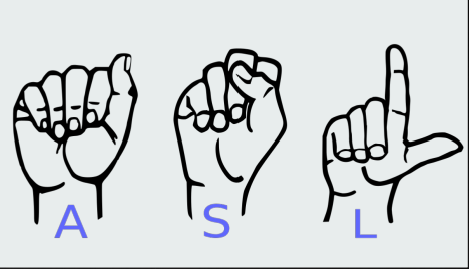

# Importing The Required Libraries

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns   # for data visualization

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization   # for tuning the model
from keras.preprocessing.image import ImageDataGenerator  # generates the images
from keras.callbacks import ReduceLROnPlateau

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix   # for making the report of a model that displays the accuracy, precision and recall and confusion matrix is used for visualizing the type1 and type2 error

# Mounting The Google Drive So That We Can Access Data From Gdrive

In [ ]:
# Mounting the google drive so that we can access data from drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loading The Training And Testing Data

In [ ]:
# Loading the dataset and saving it in dataframe
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

In [ ]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

# Reshaping Training Data And Testing Data

In [ ]:
x_train = train_df.values
x_test = test_df.values
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

# Visualizing Training Images To See If They Are Correctly Classified

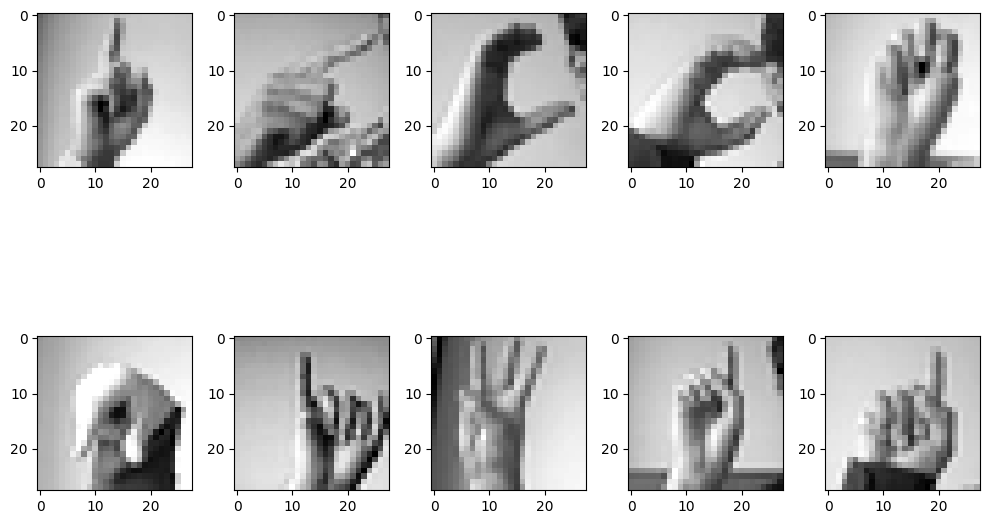

In [ ]:
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

# Building The CNN Model

In [ ]:
# Building CNN model
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

# Summary Of CNN

In [ ]:
# Represents summary of CNN
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_7 (Bat  (None, 28, 28, 64)        256       
 chNormalization)                                                
                                                                 
 flatten_3 (Flatten)         (None, 50176)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               25690624  
                                                                 
 dense_7 (Dense)             (None, 24)                12312     
                                                                 
Total params: 25703832 (98.05 MB)
Trainable params: 25703704 (98.05 MB)
Non-trainable params: 128 (512.00 Byte)
________

# Reduce Learning Rate When A Metric Has Stopped Improving

In [ ]:
# Hyperparameter tuning
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience = 2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Training The Model

In [ ]:
fitted_values1 = model.fit(x_train, y_train,
                          batch_size=128,
                          epochs = 5,
                          validation_data = (x_test, y_test),
                          callbacks = [learning_rate_reduction])

Epoch 1/5
215/215 [==============================] - 256s 1s/step - loss: 0.7430 - accuracy: 0.8921 - val_loss: 1.8992 - val_accuracy: 0.7097 - lr: 0.0010
Epoch 2/5
215/215 [==============================] - 267s 1s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.8886 - val_accuracy: 0.7630 - lr: 0.0010
Epoch 3/5
215/215 [==============================] - 259s 1s/step - loss: 4.5225e-04 - accuracy: 1.0000 - val_loss: 0.8861 - val_accuracy: 0.7669 - lr: 0.0010
Epoch 4/5
215/215 [==============================] - 258s 1s/step - loss: 1.8865e-04 - accuracy: 1.0000 - val_loss: 1.1171 - val_accuracy: 0.7606 - lr: 0.0010
Epoch 5/5
215/215 [==============================] - ETA: 0s - loss: 9.4001e-05 - accuracy: 1.0000
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 257s 1s/step - loss: 9.4001e-05 - accuracy: 1.0000 - val_loss: 1.2224 - val_accuracy: 0.7642 - lr: 0.0010


In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 [==============================] - 14s 60ms/step - loss: 1.2224 - accuracy: 0.7642
Accuracy of the model is -  76.42219662666321 %


# Building A CNN By Increasing The Layers And Adding Some Padding

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
fitted_values2 = model.fit(x_train, y_train,
                          batch_size=128,
                          epochs = 5,
                          validation_data = (x_test, y_test),
                          callbacks = [learning_rate_reduction])

Epoch 1/5
215/215 [==============================] - 87s 396ms/step - loss: 0.5369 - accuracy: 0.8439 - val_loss: 2.8736 - val_accuracy: 0.1563 - lr: 0.0010
Epoch 2/5
215/215 [==============================] - 87s 405ms/step - loss: 0.0201 - accuracy: 0.9962 - val_loss: 0.7446 - val_accuracy: 0.8171 - lr: 0.0010
Epoch 3/5
215/215 [==============================] - 85s 396ms/step - loss: 0.0071 - accuracy: 0.9989 - val_loss: 0.2181 - val_accuracy: 0.9324 - lr: 0.0010
Epoch 4/5
215/215 [==============================] - 86s 402ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.3418 - val_accuracy: 0.8974 - lr: 0.0010
Epoch 5/5
215/215 [==============================] - 88s 411ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.1567 - val_accuracy: 0.9530 - lr: 0.0010


In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 [==============================] - 5s 21ms/step - loss: 0.1567 - accuracy: 0.9530
Accuracy of the model is -  95.3011691570282 %


# Using Image Data Generator As It Helps Us Augment Images In Real-Time While Model Is Still Training

In [ ]:
image_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)


image_generator.fit(x_train)

In [ ]:
fitted_values3 = model.fit(image_generator.flow(x_train,y_train, batch_size = 128) ,
                    epochs = 5,
                    validation_data = (x_test, y_test) ,
                    callbacks = [learning_rate_reduction])

Epoch 1/5
215/215 [==============================] - 94s 432ms/step - loss: 0.2996 - accuracy: 0.9045 - val_loss: 0.2449 - val_accuracy: 0.9184 - lr: 0.0010
Epoch 2/5
215/215 [==============================] - 95s 444ms/step - loss: 0.0797 - accuracy: 0.9720 - val_loss: 0.0846 - val_accuracy: 0.9689 - lr: 0.0010
Epoch 3/5
215/215 [==============================] - 94s 436ms/step - loss: 0.0468 - accuracy: 0.9848 - val_loss: 0.0642 - val_accuracy: 0.9812 - lr: 0.0010
Epoch 4/5
215/215 [==============================] - 97s 451ms/step - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.1332 - val_accuracy: 0.9532 - lr: 0.0010
Epoch 5/5
215/215 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.9912
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 93s 433ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 1.5120 - val_accuracy: 0.6617 - lr: 0.0010


In [ ]:
print("Accuracy of the model with data augmentation is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 5s 21ms/step - loss: 1.5120 - accuracy: 0.6617
Accuracy of the model with data augmentation is -  66.17401242256165 %


In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), strides=1, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_11 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 14, 14, 50)        28850     
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_12 (Ba  (None, 14, 14, 50)       

# Training Model With More Epochs To See If The Performance Improves

In [ ]:
fitted_values4 = model.fit(image_generator.flow(x_train,y_train, batch_size = 128),
                           epochs = 20,
                           validation_data = (x_test, y_test) ,
                           callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 103s 473ms/step - loss: 0.8147 - accuracy: 0.7474 - val_loss: 3.0055 - val_accuracy: 0.0653 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 92s 429ms/step - loss: 0.1307 - accuracy: 0.9590 - val_loss: 1.4397 - val_accuracy: 0.5245 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 96s 448ms/step - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.1100 - val_accuracy: 0.9611 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 94s 436ms/step - loss: 0.0392 - accuracy: 0.9882 - val_loss: 0.2846 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - ETA: 0s - loss: 0.0283 - accuracy: 0.9910
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [==============================] - 98s 453ms/step - loss: 0.0283 - accuracy: 0.9910 - val_loss: 0.2253 - val_accuracy: 0.9189 - lr: 0.0010
Epoch 6/20
215/215 [============================

In [ ]:
print("Accuracy of the model with data augmentation is  - " , model.evaluate(x_test, y_test)[1]*100 , "%")

225/225 [==============================] - 7s 32ms/step - loss: 0.0043 - accuracy: 0.9983
Accuracy of the model with data augmentation is  -  99.832683801651 %


# Visualizing The Accuracy And Loss In The Form Of Graphs

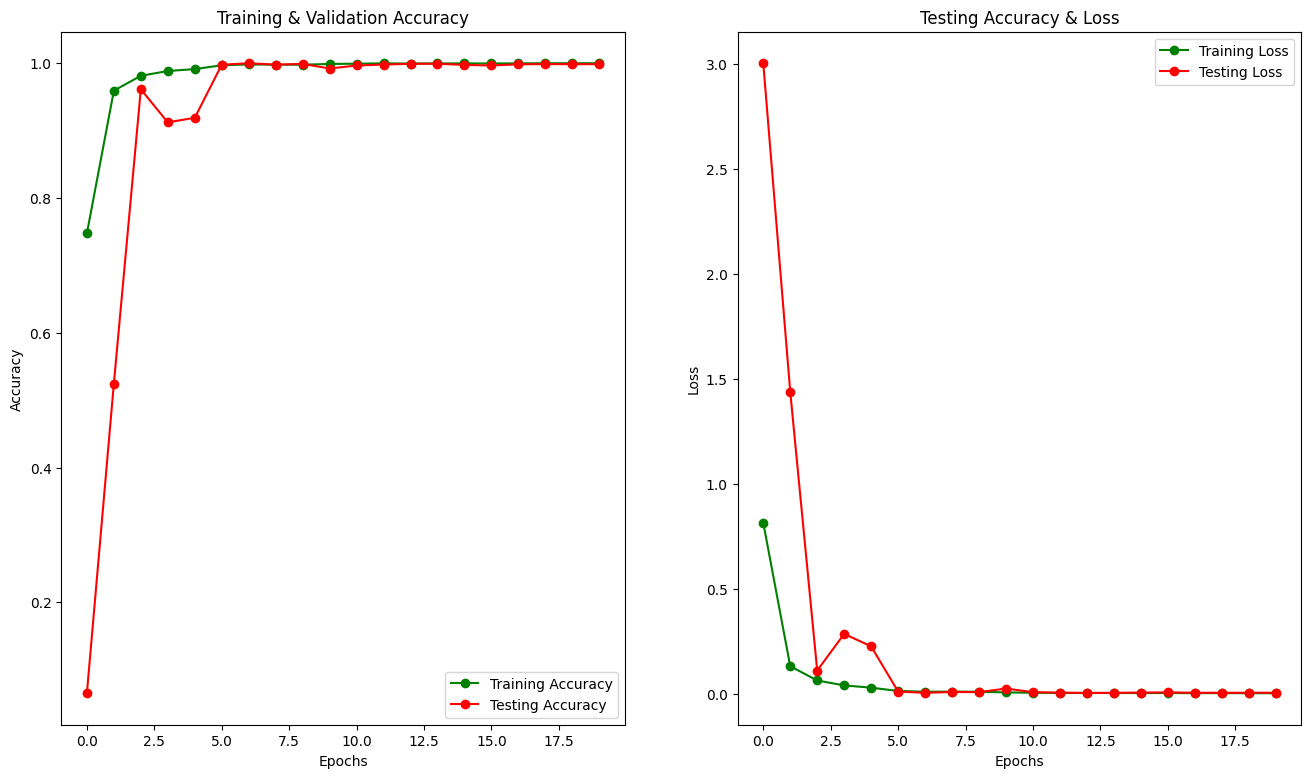

In [ ]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = fitted_values4.history['accuracy']
train_loss = fitted_values4.history['loss']
val_acc = fitted_values4.history['val_accuracy']
val_loss = fitted_values4.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [ ]:
predictions = model.predict(x_test)

225/225 [==============================] - 5s 21ms/step


In [ ]:
# Saving the model
model.save("sign_language_cnn_model")